404/404 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0232
Training Set Accuracy=0.9950
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.8778 - loss: 0.3910
Test Set Accuracy=0.8605
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Class 0 - AN (Anger)
>> TPR: 1.0000
>> PPV: 0.8571
>> F1: 0.9231

Class 1 - DI (Disgust)
>> TPR: 0.8333
>> PPV: 1.0000
>> F1: 0.9091

Class 2 - FE (Fear)
>> TPR: 0.7143
>> PPV: 0.8333
>> F1: 0.7692

Class 3 - HA (Happiness)
>> TPR: 1.0000
>> PPV: 0.8571
>> F1: 0.9231

Class 4 - NE (Neutral)
>> TPR: 1.0000
>> PPV: 0.8571
>> F1: 0.9231

Class 5 - SA (Sadness)
>> TPR: 0.6667
>> PPV: 0.8000
>> F1: 0.7273

Class 6 - SU (Surprise)
>> TPR: 0.8333
>> PPV: 0.8333
>> F1: 0.8333

>> Macro-Average TPR: 0.8639
>> Macro-Average PPV: 0.8626
>> Macro-Average F1: 0.8583
>> Accuracy: 0.8605


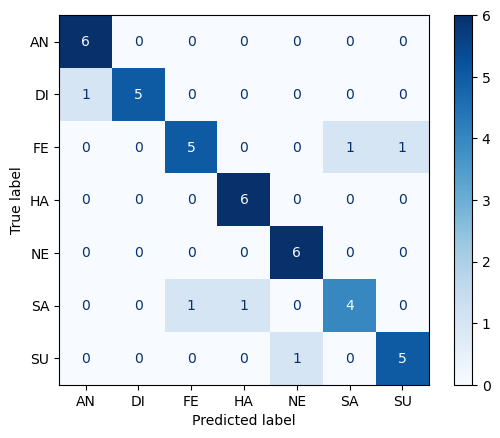

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import data as tf_data
from tensorflow import keras
from keras import Model, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Flatten, Reshape, Conv2D, AveragePooling2D, Resizing
from keras.layers import RandomCrop, RandomFlip, RandomTranslation, RandomRotation, RandomZoom, RandomContrast, RandomBrightness


def LabelGeneration(y):  # string to integer
    y[np.isin(y, "AN")] = 0
    y[np.isin(y, "DI")] = 1
    y[np.isin(y, "FE")] = 2
    y[np.isin(y, "HA")] = 3
    y[np.isin(y, "NE")] = 4
    y[np.isin(y, "SA")] = 5
    y[np.isin(y, "SU")] = 6
    return pd.get_dummies(y)


def ImageAugmentation(x, augmentation_layers):
    for layer in augmentation_layers:
        x = layer(x)

    return x
    

def VisualizeLossCurve(h):
    plt.figure()
    plt.plot(h.history["loss"], label="Training")
    plt.plot(h.history["val_loss"], label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()


def CalculateF1(tp, fn, fp):
        tpr = tp / (tp + fn)
        ppv = tp / (tp + fp)
        f1 = 2 * ppv * tpr / (ppv + tpr)
        return tpr, ppv, f1
    

def ShowEvaluationResult(y_true, y_pred):
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    class_name = ["AN", "DI", "FE", "HA", "NE", "SA", "SU"]
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                   display_labels=class_name, 
                                                   cmap=plt.cm.Blues)

    arr = cm.ravel().reshape(len(class_name), len(class_name))
    ######## Class 0 - AN (Anger) ########
    tp_c0 = arr[0, 0]
    fn_c0 = arr[0, 1] + arr[0, 2] + arr[0, 3] + arr[0, 4] + arr[0, 5] + arr[0, 6]
    fp_c0 = arr[1, 0] + arr[2, 0] + arr[3, 0] + arr[4, 0] + arr[5, 0] + arr[6, 0]
    tpr_c0, ppv_c0, f1_c0 = CalculateF1(tp_c0, fn_c0, fp_c0)
    print("Class 0 - AN (Anger)")
    print(">> TPR: %.4f" % (tpr_c0))
    print(">> PPV: %.4f" % (ppv_c0))
    print(">> F1: %.4f" % (f1_c0))

    ######## Class 1 - DI (Disgust) ########
    tp_c1 = arr[1, 1]
    fn_c1 = arr[1, 0] + arr[1, 2] + arr[1, 3] + arr[1, 4] + arr[1, 5] + arr[1, 6]
    fp_c1 = arr[0, 1] + arr[2, 1] + arr[3, 1] + arr[4, 1] + arr[5, 1] + arr[6, 1]
    tpr_c1, ppv_c1, f1_c1 = CalculateF1(tp_c1, fn_c1, fp_c1)
    print("\nClass 1 - DI (Disgust)")
    print(">> TPR: %.4f" % (tpr_c1))
    print(">> PPV: %.4f" % (ppv_c1))
    print(">> F1: %.4f" % (f1_c1))

    ######## Class 2 - FE (Fear) ########
    tp_c2 = arr[2, 2]
    fn_c2 = arr[2, 0] + arr[2, 1] + arr[2, 3] + arr[2, 4] + arr[2, 5] + arr[2, 6]
    fp_c2 = arr[0, 2] + arr[1, 2] + arr[3, 2] + arr[4, 2] + arr[5, 2] + arr[6, 2]
    tpr_c2, ppv_c2, f1_c2 = CalculateF1(tp_c2, fn_c2, fp_c2)
    print("\nClass 2 - FE (Fear)")
    print(">> TPR: %.4f" % (tpr_c2))
    print(">> PPV: %.4f" % (ppv_c2))
    print(">> F1: %.4f" % (f1_c2))

    ######## Class 3 - HA (Happiness) ########
    tp_c3 = arr[3, 3]
    fn_c3 = arr[3, 0] + arr[3, 1] + arr[3, 2] + arr[3, 4] + arr[3, 5] + arr[3, 6]
    fp_c3 = arr[0, 3] + arr[1, 3] + arr[2, 3] + arr[4, 3] + arr[5, 3] + arr[6, 3]
    tpr_c3, ppv_c3, f1_c3 = CalculateF1(tp_c3, fn_c3, fp_c3)
    print("\nClass 3 - HA (Happiness)")
    print(">> TPR: %.4f" % (tpr_c3))
    print(">> PPV: %.4f" % (ppv_c3))
    print(">> F1: %.4f" % (f1_c3))

    ######## Class 4 - NE (Neutral) ########
    tp_c4 = arr[4, 4]
    fn_c4 = arr[4, 0] + arr[4, 1] + arr[4, 2] + arr[4, 3] + arr[4, 5] + arr[4, 6]
    fp_c4 = arr[0, 4] + arr[1, 4] + arr[2, 4] + arr[3, 4] + arr[5, 4] + arr[6, 4]
    tpr_c4, ppv_c4, f1_c4 = CalculateF1(tp_c4, fn_c4, fp_c4)
    print("\nClass 4 - NE (Neutral)")
    print(">> TPR: %.4f" % (tpr_c4))
    print(">> PPV: %.4f" % (ppv_c4))
    print(">> F1: %.4f" % (f1_c4))

    ######## Class 5 - SA (Sadness) ########
    tp_c5 = arr[5, 5]
    fn_c5 = arr[5, 0] + arr[5, 1] + arr[5, 2] + arr[5, 3] + arr[5, 4] + arr[5, 6]
    fp_c5 = arr[0, 5] + arr[1, 5] + arr[2, 5] + arr[3, 5] + arr[4, 5] + arr[6, 5]
    tpr_c5, ppv_c5, f1_c5 = CalculateF1(tp_c5, fn_c5, fp_c5)
    print("\nClass 5 - SA (Sadness)")
    print(">> TPR: %.4f" % (tpr_c5))
    print(">> PPV: %.4f" % (ppv_c5))
    print(">> F1: %.4f" % (f1_c5))

    ######## Class 6 - SU (Surprise) ########
    tp_c6 = arr[6, 6]
    fn_c6 = arr[6, 0] + arr[6, 1] + arr[6, 2] + arr[6, 3] + arr[6, 4] + arr[6, 5]
    fp_c6 = arr[0, 6] + arr[1, 6] + arr[2, 6] + arr[3, 6] + arr[4, 6] + arr[5, 6]
    tpr_c6, ppv_c6, f1_c6 = CalculateF1(tp_c6, fn_c6, fp_c6)
    print("\nClass 6 - SU (Surprise)")
    print(">> TPR: %.4f" % (tpr_c6))
    print(">> PPV: %.4f" % (ppv_c6))
    print(">> F1: %.4f" % (f1_c6))

    print("\n>> Macro-Average TPR: %.4f" % \
          ((tpr_c0 + tpr_c1 + tpr_c2 + tpr_c3 + tpr_c4 + tpr_c5 + tpr_c6) / 7))
    print(">> Macro-Average PPV: %.4f" % \
          ((ppv_c0 + ppv_c1 + ppv_c2 + ppv_c3 + ppv_c4 + ppv_c5 + ppv_c6) / 7))
    print(">> Macro-Average F1: %.4f" % \
          ((f1_c0 + f1_c1 + f1_c2 + f1_c3 + f1_c4 + f1_c5 + f1_c6) / 7))
    print(">> Accuracy: %.4f" % \
          ((arr[0, 0] + arr[1, 1] + arr[2, 2] + arr[3, 3] + arr[4, 4] + arr[5, 5] + arr[6, 6]) / (np.sum(arr))))


if __name__ == "__main__":
    # Control Parameters
    BATCH_SIZE = 4
    EPOCHS = 80
    idx_tc = 1  # index of test cases [0, 1]; 0 for baseline and 1 for Proposed

    if idx_tc == 0: data = np.load("jaffe_base.npz")  # Baseline Performance
    elif idx_tc == 1: data = np.load("jaffe_da.npz")  # Proposed Data Augmentation

    x_train, y_train = data["x_train"], data["y_train"]
    x_test, y_test = data["x_test"], data["y_test"]

    n_classes = len(np.unique(y_train))

    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

    y_train = LabelGeneration(y_train)
    y_val = LabelGeneration(y_val)
    y_test = LabelGeneration(y_test)
    
    x_train = x_train.reshape(len(x_train), 48, 48, 1)
    x_val = x_val.reshape(len(x_val), 48, 48, 1)
    x_test = x_test.reshape(len(x_test), 48, 48, 1)
    
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    
    # # Image Augmentation Layers
    # ia_layers = [
    #     # RandomCrop(height=, width=),
    #     RandomFlip(mode="horizontal"), # "vertical" or "horizontal_and_vertical"
    #     # RandomTranslation(height_factor=0.1, width_factor=0.1),
    #     # RandomRotation(factor=0.1),
    #     # RandomZoom(height_factor=, width_factor=None),
    #     RandomContrast(factor=0.1),
    #     RandomBrightness(factor=0.1),
    # ]
    # train_ds = train_ds.map(lambda x, y: (ImageAugmentation(x, ia_layers), y))

    train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf_data.AUTOTUNE).cache()
    val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf_data.AUTOTUNE).cache()
    test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf_data.AUTOTUNE).cache()

    # LeNet-5 Architecture
    inputs = Input(shape=(48, 48, 1))  # Input Layer
    x = Resizing(height=32, width=32)(inputs)
    x = Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu")(x)  # Layer C1
    x = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)  # Layer S2
    x = Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu")(x)  # Layer C3
    x = AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")(x)  # Layer S4
    x = Conv2D(filters=120, kernel_size=(5, 5), strides=(1, 1), padding="valid", activation="relu")(x)  # Layer C5
    x = Flatten()(x)
    x = Dense(units=84, activation="relu")(x)  # Layer F6
    outputs = Dense(units=n_classes, activation="softmax")(x)  # Output Layer

    model = Model(inputs, outputs)
    # model.summary()
    
    model.compile(optimizer=keras.optimizers.Adam(), 
                  loss=keras.losses.CategoricalCrossentropy(), 
                  metrics=["accuracy"])

    modelpath = "./LeNet5.keras"
    mc = keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor="val_loss", verbose=0, save_best_only=True)
    es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
    
    history = model.fit(train_ds, epochs=EPOCHS, verbose=0, callbacks=[es], validation_data=val_ds)
    # VisualizeLossCurve(history)

    acc_score = model.evaluate(train_ds)
    print("Training Set Accuracy=%.4f" % (acc_score[1]))
    
    acc_score = model.evaluate(test_ds)
    print("Test Set Accuracy=%.4f" % (acc_score[1]))

    y_pred = model.predict(test_ds)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = pd.from_dummies(y_test)
    y_test = y_test.to_numpy(dtype="int").reshape(-1)
    ShowEvaluationResult(y_test, y_pred)